In [8]:
# In this code,  protein level predictions obtained from all three models: efficacy, accuracy and hybrid are plotted.
# The results are plotted in a scatter plot, where the x-axis is the predicted protein expression and the y-axis is the experimentally meassured protein expression.
# The package ggplot2 is used.

# Author: 
# Alejandra Lopez Sosa, June 2023, Zurich University of Applied Sciences,
# Institute for Chemistry and Biotechnology

# Data description

# Protein expression levels measurements (empirical data)
# These data were generated by Marco Gees, Zrinka Raguz Nakic and Christin Peters 
# from the Institute of Biotechnology, ZHAW Wädenswil, during the years 2020-2022. 
# They are stored under the name Testing_the_TEH/data/data_gfp_zrinka.csv

In [9]:
# install ggplot2 package for plotting functions
install.packages("ggplot2")

# Load ggplot2 package
library(ggplot2)

# set the working directory
setwd("/Users/ale/Documents/thesis_codon_bias/Testing_the_TEH/Rscripts")

Warning message in readRDS(dest):
"lzma decoder corrupt data"



  Une version binaire est disponible mais la version du source est plus
  r'ecente:
        binary source needs_compilation
ggplot2  3.4.2  3.4.3             FALSE



installation du package source 'ggplot2'




# Plotting efficacy-model predictions

### Dataframes

##### BL21DE3 strain set

In [10]:
# Read dataframe and store in variable
efficacy_bl21 <- read.csv("dataframes/efficacy/predicted_efficacy_bl21.csv")

In [11]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(efficacy_bl21$sequence_name, "-")
efficacy_bl21$sequence_name <- sapply(cols, "[", 1)
efficacy_bl21$algorithm <- sapply(cols, "[", 2)

names(efficacy_bl21)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level" "algorithm"

In [12]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=efficacy_bl21)

# R^2
summary(lm)$r.squared

[1] 0.2078266

`geom_smooth()` using formula = 'y ~ x'


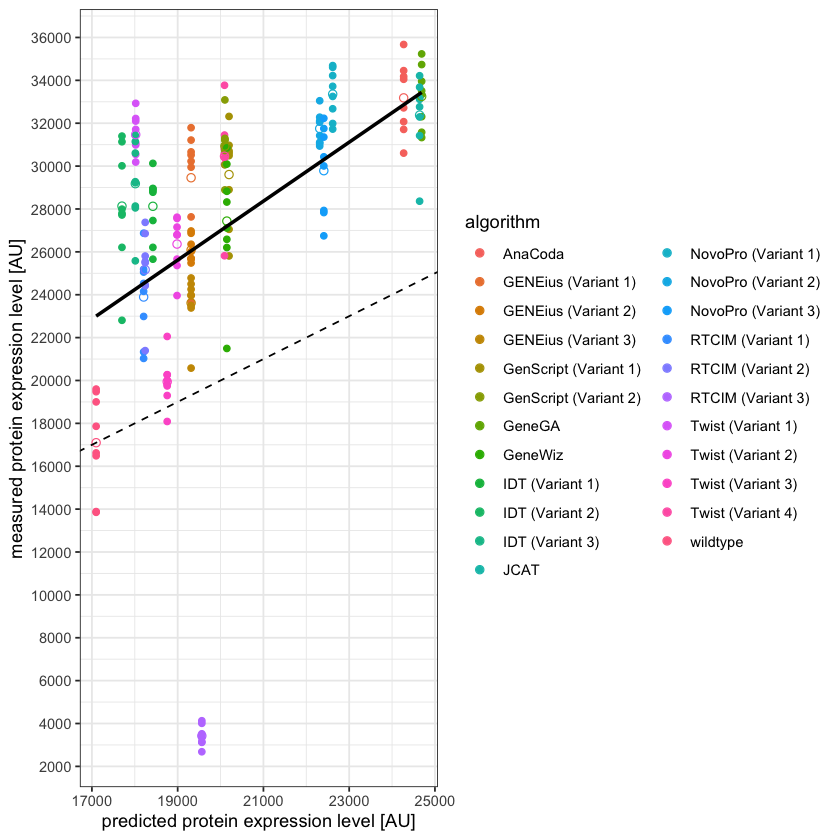

In [13]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(efficacy_bl21, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [14]:
# store the plot in a pdf file
ggsave("plots/efficacy/efficacy_bl21.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


#### K12 strain set

In [15]:
# Read dataframe and store in variable
efficacy_k12 <- read.csv("dataframes/efficacy/predicted_efficacy_k12.csv")

In [16]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(efficacy_k12$sequence_name, "-")
efficacy_k12$sequence_name <- sapply(cols, "[", 1)
efficacy_k12$algorithm <- sapply(cols, "[", 2)

names(efficacy_k12)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level" "algorithm"

In [17]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=efficacy_k12)

# R^2
summary(lm)$r.squared

[1] 0.386661

`geom_smooth()` using formula = 'y ~ x'


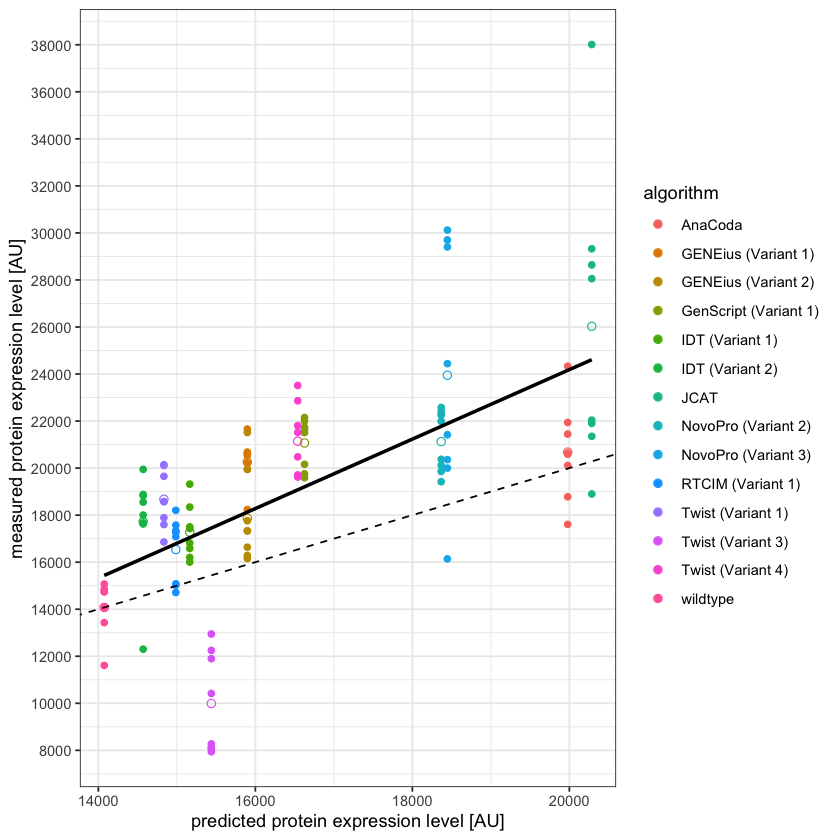

In [18]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(efficacy_k12, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [19]:
# store the plot in a pdf file
ggsave("plots/efficacy/efficacy_k12.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


### Dataframes without outliers

#### K12 strain set

In [20]:
# Read dataframe and store in variable
efficacy_k12_no_outliers <- read.csv("dataframes/efficacy/predicted_efficacy_no_outliers_k12.csv")

In [21]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(efficacy_k12_no_outliers$sequence_name, "-")
efficacy_k12_no_outliers$sequence_name <- sapply(cols, "[", 1)
efficacy_k12_no_outliers$algorithm <- sapply(cols, "[", 2)

names(efficacy_k12_no_outliers)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level" "algorithm"

In [22]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=efficacy_k12_no_outliers)

# R^2
summary(lm)$r.squared

[1] 0.3675617

`geom_smooth()` using formula = 'y ~ x'


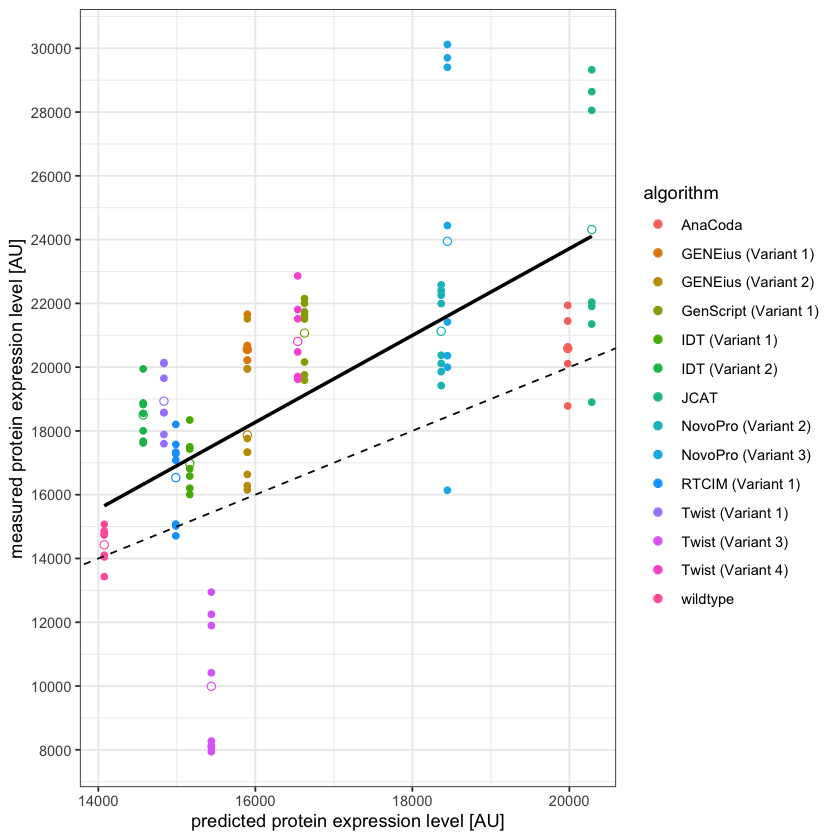

In [23]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(efficacy_k12_no_outliers, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [24]:
# store the plot in a pdf file
ggsave("plots/efficacy/efficacy_k12_no_outliers.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


#### BL21DE3 strain set

In [25]:
# Read dataframe and store in variable
efficacy_bl21_no_outliers <- read.csv("dataframes/efficacy/predicted_efficacy_no_outliers_bl21.csv")

In [26]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(efficacy_bl21_no_outliers$sequence_name, "-")
efficacy_bl21_no_outliers$sequence_name <- sapply(cols, "[", 1)
efficacy_bl21_no_outliers$algorithm <- sapply(cols, "[", 2)

names(efficacy_bl21_no_outliers)

[1] "X"               "sequence_name"   "strain"          "value"          
[5] "predicted_level" "algorithm"

In [27]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=efficacy_bl21_no_outliers)

# R^2
summary(lm)$r.squared

[1] 0.2175843

`geom_smooth()` using formula = 'y ~ x'


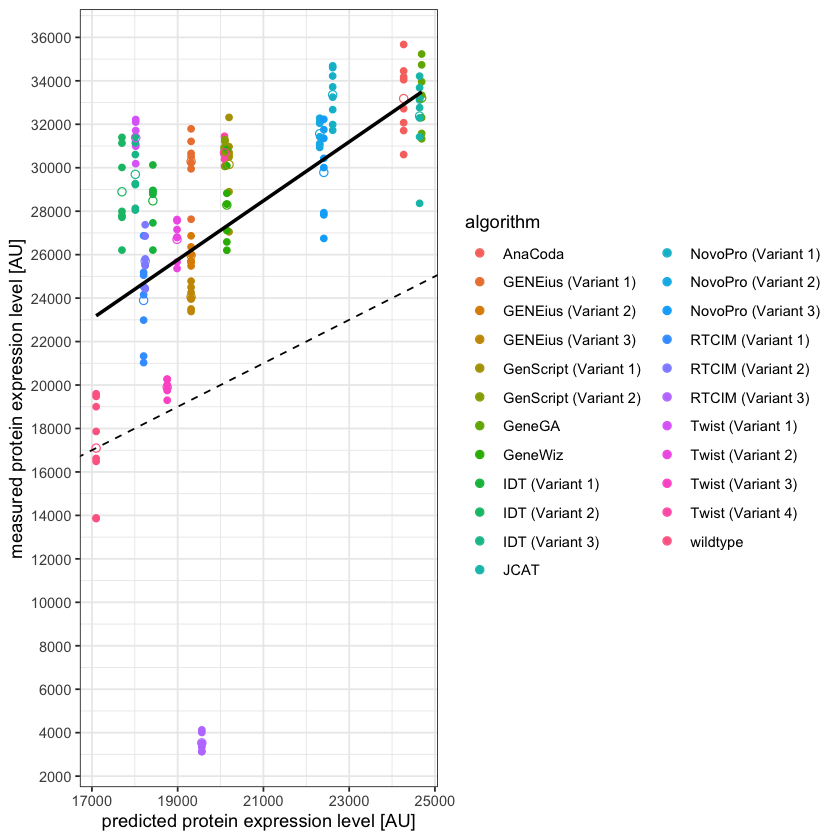

In [28]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(efficacy_bl21_no_outliers, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [29]:
# store the plot in a pdf file
ggsave("plots/efficacy/efficacy_bl21_no_outliers.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


# Plotting accuracy-model predictions

### Dataframes

#### K12 strain set

In [30]:
# Read dataframe and store in variable
accuracy_k12 <- read.csv("dataframes/accuracy/accuracy_model_predictions_k12.csv")

In [31]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(accuracy_k12$sequence_name, "-")
accuracy_k12$sequence_name <- sapply(cols, "[", 1)
accuracy_k12$algorithm <- sapply(cols, "[", 2)

names(accuracy_k12)

[1] "sequence_name"   "strain"          "value"           "predicted_level"
[5] "algorithm"

In [32]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=accuracy_k12)

# R^2
summary(lm)$r.squared

[1] 0.382245

`geom_smooth()` using formula = 'y ~ x'


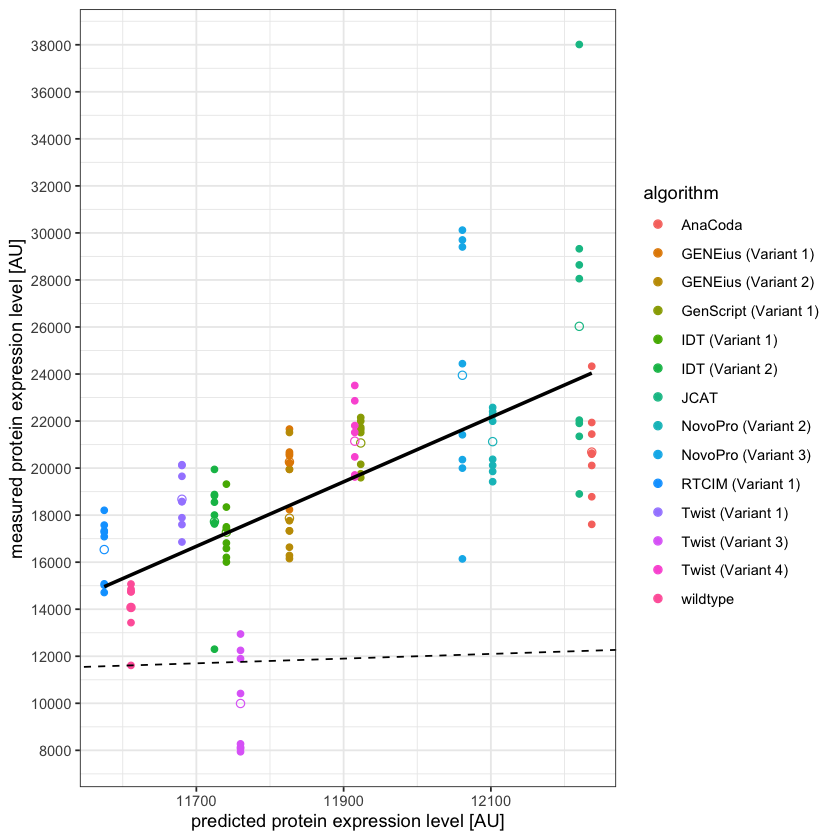

In [33]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(accuracy_k12, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [34]:
# store the plot in a pdf file
ggsave("plots/accuracy/accuracy_k12.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


#### BL21DE3 strain set

In [35]:
accuracy_bl21 <- read.csv("dataframes/accuracy/accuracy_model_predictions_bl21.csv")

In [36]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(accuracy_bl21$sequence_name, "-")
accuracy_bl21$sequence_name <- sapply(cols, "[", 1)
accuracy_bl21$algorithm <- sapply(cols, "[", 2)

names(accuracy_bl21)

[1] "sequence_name"   "strain"          "value"           "predicted_level"
[5] "algorithm"

In [37]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=accuracy_bl21)

# R^2
summary(lm)$r.squared

[1] 0.2140819

`geom_smooth()` using formula = 'y ~ x'


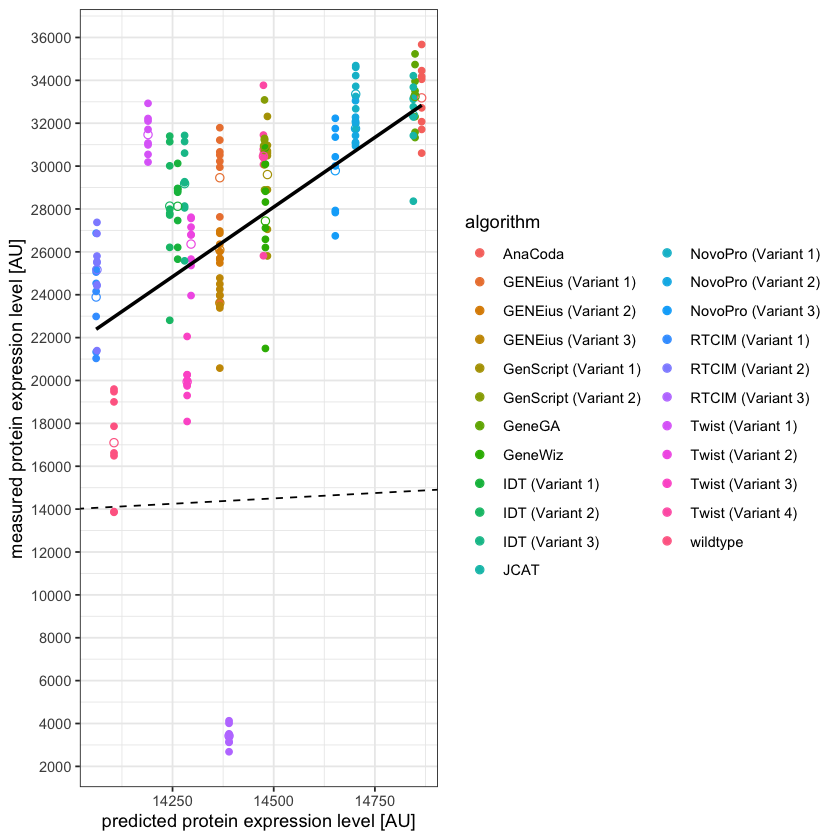

In [38]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(accuracy_bl21, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [39]:
# store the plot in a pdf file
ggsave("plots/accuracy/accuracy_bl21.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


### Dataframes without outliers

#### K12 strain set

In [40]:
# Read dataframe and store in variable
accuracy_k12_no_out <- read.csv("dataframes/accuracy/accuracy_model_predictions_no_outliers_k12.csv")

In [41]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(accuracy_k12_no_out$sequence_name, "-")
accuracy_k12_no_out$sequence_name <- sapply(cols, "[", 1)
accuracy_k12_no_out$algorithm <- sapply(cols, "[", 2)

names(accuracy_k12_no_out)

[1] "sequence_name"   "strain"          "value"           "predicted_level"
[5] "algorithm"

In [42]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=accuracy_k12_no_out)

# R^2
summary(lm)$r.squared

[1] 0.3739668

`geom_smooth()` using formula = 'y ~ x'


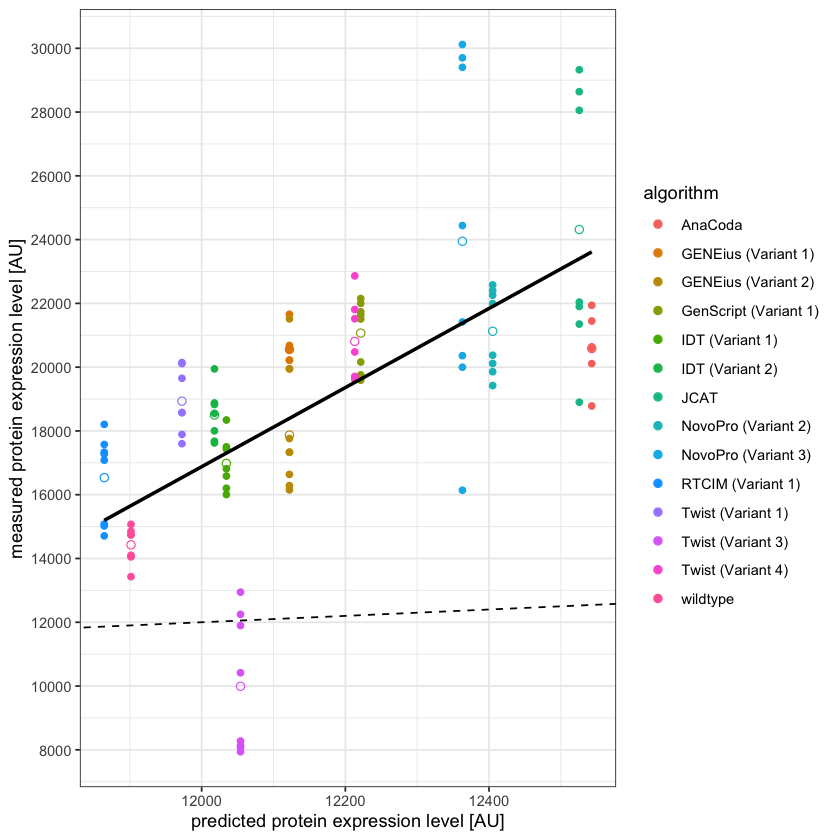

In [43]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(accuracy_k12_no_out, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [44]:
# store the plot in a pdf file
ggsave("plots/accuracy/accuracy_k12_no_outliers.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


#### BL21DE3 strain set

In [45]:
# Read dataframe and store in variable
accuracy_bl21_no_out <- read.csv("dataframes/accuracy/accuracy_model_predictions_no_outliers_bl21.csv")

In [46]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(accuracy_bl21_no_out$sequence_name, "-")
accuracy_bl21_no_out$sequence_name <- sapply(cols, "[", 1)
accuracy_bl21_no_out$algorithm <- sapply(cols, "[", 2)

names(accuracy_bl21_no_out)

[1] "sequence_name"   "strain"          "value"           "predicted_level"
[5] "algorithm"

In [47]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=accuracy_bl21_no_out)

# R^2
summary(lm)$r.squared

[1] 0.226033

`geom_smooth()` using formula = 'y ~ x'


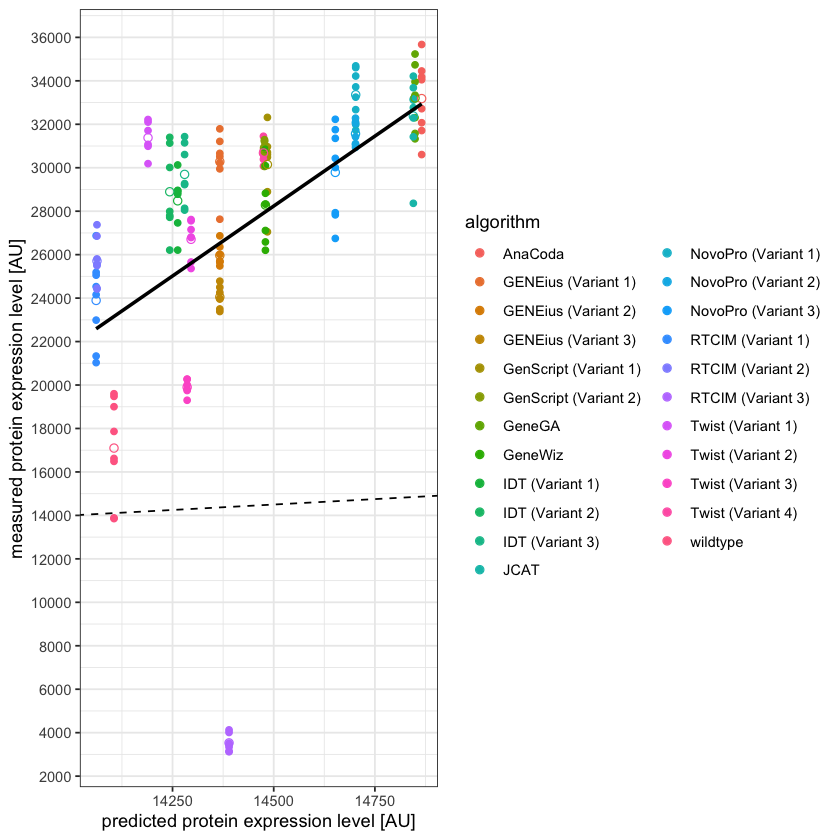

In [48]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(accuracy_bl21_no_out, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [49]:
# store the plot in a pdf file
ggsave("plots/accuracy/accuracy_bl21_no_outliers.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


# Plotting efficacy+accuracy-model predictions

### Dataframes

#### K12 strain set

In [50]:
# Read dataframe and store in variable
effi_accu_k12 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_K12.csv")

In [51]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(effi_accu_k12$sequence_name, "-")
effi_accu_k12$sequence_name <- sapply(cols, "[", 1)
effi_accu_k12$algorithm <- sapply(cols, "[", 2)

names(effi_accu_k12)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"   "algorithm"

In [52]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=effi_accu_k12)

# R^2
summary(lm)$r.squared

[1] 0.1793567

`geom_smooth()` using formula = 'y ~ x'


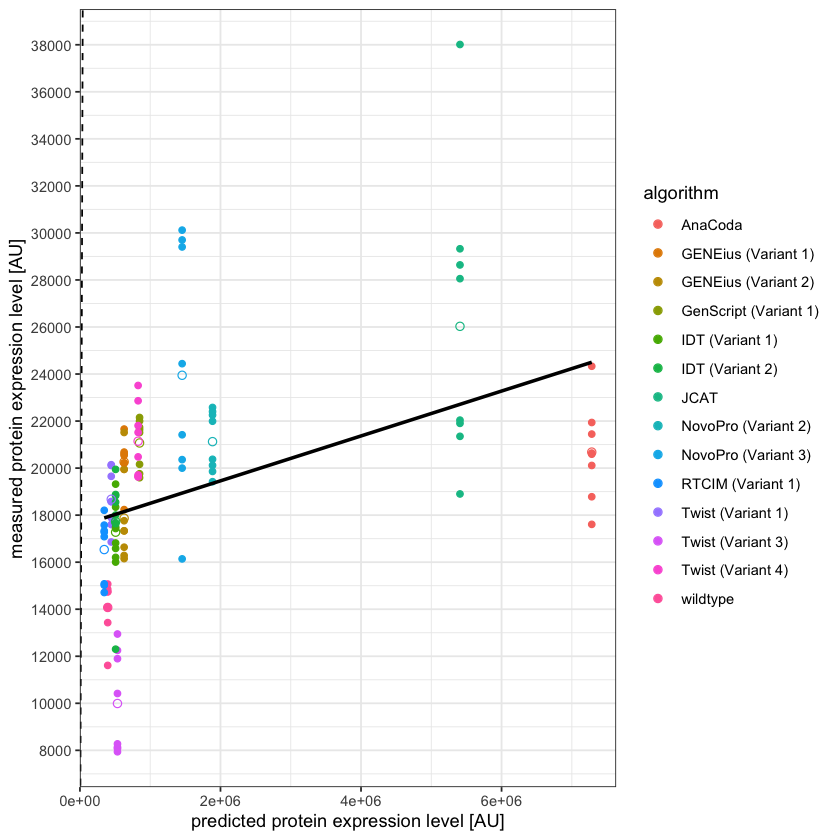

In [53]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(effi_accu_k12, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [54]:
# store the plot in a pdf file
ggsave("plots/efficacy_accuracy/efficacy_accuracy_k12.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


#### BL21DE3 strain set

In [55]:
# Read dataframe and store in variable
effi_accu_bl21 <- read.csv("dataframes/efficacy_accuracy/data_ecoli_BL21DE3.csv")

In [56]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(effi_accu_bl21$sequence_name, "-")
effi_accu_bl21$sequence_name <- sapply(cols, "[", 1)
effi_accu_bl21$algorithm <- sapply(cols, "[", 2)

names(effi_accu_bl21)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"   "algorithm"

In [57]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=effi_accu_bl21)

# R^2
summary(lm)$r.squared

[1] 0.1613314

`geom_smooth()` using formula = 'y ~ x'


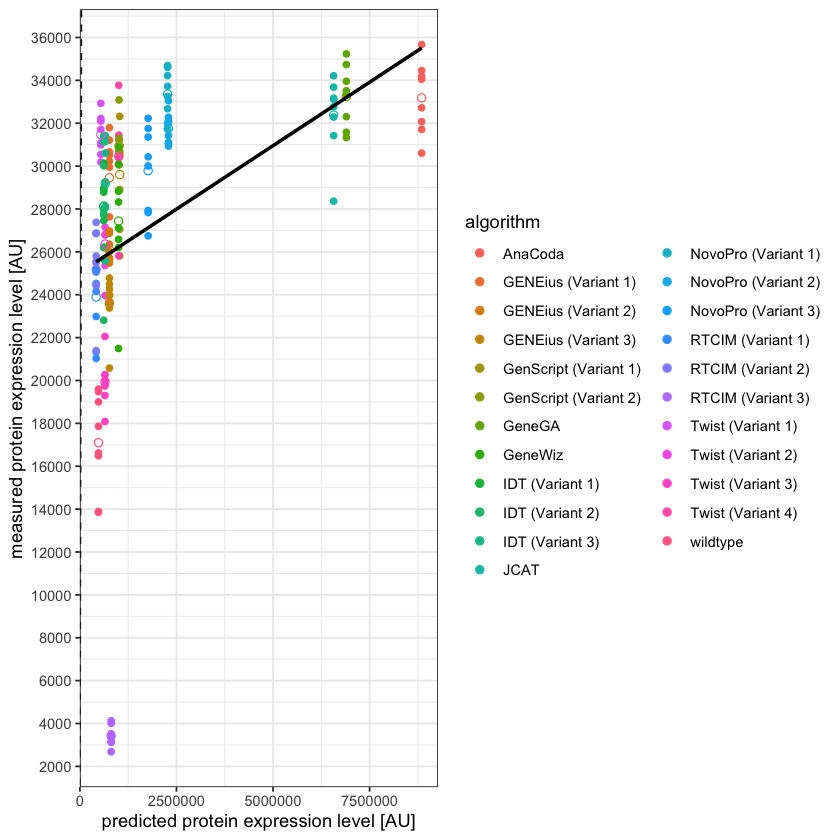

In [58]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(effi_accu_bl21, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [59]:
# store the plot in a pdf file
ggsave("plots/efficacy_accuracy/efficacy_accuracy_bl21.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


### Dataframes without outliers

#### K12 strain set

In [60]:
# Read dataframe and store in variable
effi_accu_k12_no_outliers <- read.csv("dataframes/efficacy_accuracy/data_ecoli_no_outliers_K12.csv")

In [61]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(effi_accu_k12_no_outliers$sequence_name, "-")
effi_accu_k12_no_outliers$sequence_name <- sapply(cols, "[", 1)
effi_accu_k12_no_outliers$algorithm <- sapply(cols, "[", 2)

names(effi_accu_k12_no_outliers)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"   "algorithm"

In [62]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=effi_accu_k12_no_outliers)

# R^2
summary(lm)$r.squared

[1] 0.1583914

`geom_smooth()` using formula = 'y ~ x'


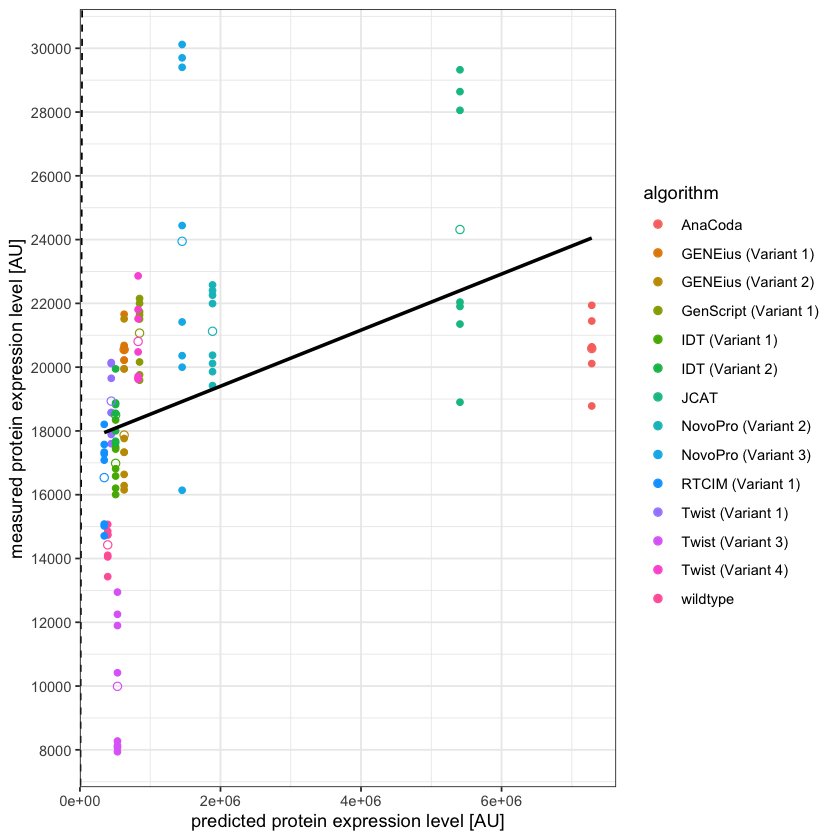

In [63]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(effi_accu_k12_no_outliers, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [64]:
# store the plot in a pdf file
ggsave("plots/efficacy_accuracy/efficacy_accuracy_k12_no_outliers.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'


#### BL21DE3 strain set

In [65]:
# Read dataframe and store in variable
effi_accu_bl21_no_out <- read.csv("dataframes/efficacy_accuracy/data_ecoli_no_outliers_BL21DE3.csv")

In [66]:
# split sequence_name column into two columns (sequence_name, alogrithm) with separator "-"
cols <- strsplit(effi_accu_bl21_no_out$sequence_name, "-")
effi_accu_bl21_no_out$sequence_name <- sapply(cols, "[", 1)
effi_accu_bl21_no_out$algorithm <- sapply(cols, "[", 2)

names(effi_accu_bl21_no_out)

[1] "X"                 "sequence_id"       "sequence_name"    
[4] "strain"            "value"             "mean_fluorescence"
[7] "predicted_level"   "algorithm"

In [67]:
# compute linear regression on x = predicted_level, y = value
lm <- lm(value ~ predicted_level, data=effi_accu_bl21_no_out)

# R^2
summary(lm)$r.squared

[1] 0.1644447

`geom_smooth()` using formula = 'y ~ x'


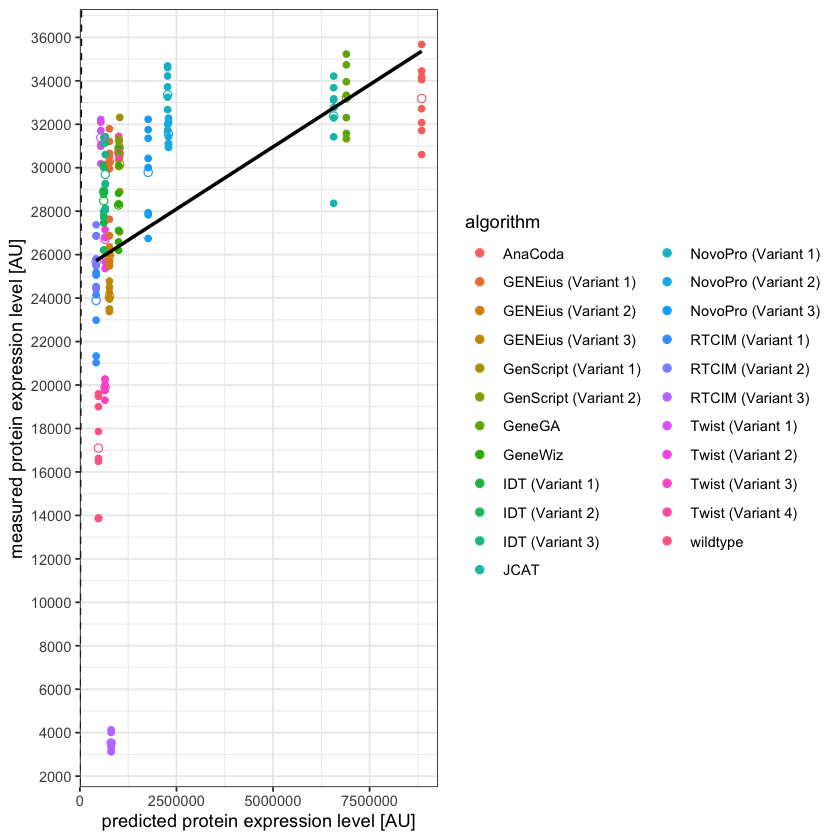

In [68]:
# ggplot2 value and predicted_level, color by algorithm
ggplot(effi_accu_bl21_no_out, aes(x = predicted_level, y = value, color = algorithm)) +
    theme_bw() +
    geom_point() +
    # highlight the mean for each algorithm
    stat_summary(fun = mean, geom = "point", shape = 1, size = 2) +
    # ylim(c(0, 40000)) +
    scale_y_continuous(breaks = seq(0, 40000, 2000)) +
    xlab("predicted protein expression level [AU]") +
    ylab("measured protein expression level [AU]") +
    # add linear regression line
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    # add diagonal line
    geom_abline(intercept = 0, slope = 1, color = "black", linetype = "dashed")

In [69]:
# store the plot in a pdf file
ggsave("plots/efficacy_accuracy/efficacy_accuracy_bl21_no_outliers.pdf", width = 6, height = 6)

`geom_smooth()` using formula = 'y ~ x'
